This notebook is designed to demonstrate the following,

1. How to use TensorFlow script mode.
2. How to use SageMaker Debugger to save Tensors
3. How to save data for TensorBoard ()
4. How to create a Trial
5. How to get Tensor data and visualize it.

In [ ]:
!  python -m pip install smdebug

In [28]:
entry_point_script = 'tf_keras_resnet_zerocodechange.py'

In [29]:
import boto3
import os
import sagemaker
from sagemaker.tensorflow import TensorFlow
from sagemaker.debugger import DebuggerHookConfig, CollectionConfig, TensorBoardOutputConfig, Rule, rule_configs


sagemaker_session = sagemaker.Session()
BUCKET_NAME = "ml-pipeline-1511"
LOCATION_IN_BUCKET = 'smdebug-tf'

s3_bucket_for_tensors = 's3://{BUCKET_NAME}/{LOCATION_IN_BUCKET}'.format(BUCKET_NAME=BUCKET_NAME, LOCATION_IN_BUCKET=LOCATION_IN_BUCKET)

tb_config = TensorBoardOutputConfig('s3://ml-pipeline-1511/tensorboard')

cnf = DebuggerHookConfig(
                      s3_output_path=s3_bucket_for_tensors,  
                      collection_configs=[
                        CollectionConfig(
                            name="all",
                            parameters={
                                "include_regex": ".*",
                                "save_interval": "100"
                            }
                        )
                     ]
                )

estimator = TensorFlow(
    role=sagemaker.get_execution_role(),
    base_job_name='smdebug-sm-tf',
    train_instance_count=1,
    train_instance_type='ml.m5.xlarge',
    entry_point = entry_point_script ,
    framework_version='1.15',
    py_version='py3',
    train_max_run=3600,
    script_mode=True,
    debugger_hook_config = cnf,
    
    tensorboard_output_config=tb_config
    
    
)

In [30]:
estimator.fit(wait=True)

2020-04-30 11:26:38 Starting - Starting the training job...
2020-04-30 11:26:39 Starting - Launching requested ML instances...
2020-04-30 11:27:37 Starting - Preparing the instances for training......
2020-04-30 11:28:31 Downloading - Downloading input data
2020-04-30 11:28:31 Training - Downloading the training image..WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/__init__.py:1473: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.

2020-04-30 11:28:47,343 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2020-04-30 11:28:47,349 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-04-30 11:28:47,714 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-04-30 11:28:49,144 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-04-30 11:28:49,159 sagemaker-containers INFO     No GPUs detected 

2203648/170498071 [..............................] - ETA: 29:39#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  2236416/170498071 [..............................] - ETA: 29:19#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  2252800/170498071 [..............................] - ETA: 29:11#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  2269184/17049

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 18210816/170498071 [==>...........................] - ETA: 4:26#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 18391040/170498071 [==>...........................] - ETA: 4:23#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015 18767872/170498071 [==>...........................] - ETA: 4:18#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010

#010#010#010#010#010#010#010#010#010#015123772928/170498071 [====================>.........] - ETA: 17s#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015124379136/170498071 [====================>.........] - ETA: 16s#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015124772352/170498071 [====================>.........] - ETA: 16s#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015125

Train on 50000 samples, validate on 10000 samples




Epoch 1/3
[2020-04-30 11:29:57.434 ip-10-0-179-239.ap-south-1.compute.internal:27 INFO hook.py:364] Monitoring the collections: weights, gradients, biases, losses, sm_metrics, default, all, optimizer_variables, outputs, metrics, inputs
ERROR:root:'NoneType' object has no attribute 'write'
#015  128/50000 [..............................] - ETA: 4:45:02 - loss: 3.6129 - acc: 0.0859#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  256/50000 [..............................] - ETA: 3:04:58 - loss: 3.9313 - acc: 0.1250#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010

#010#010#010#010#010#010#010#010#010#010#010#010#01512288/50000 [======>.......................] - ETA: 7:26 - loss: 2.3269 - acc: 0.2580#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512416/50000 [======>.......................] - ETA: 7:23 - loss: 2.3230 - acc: 0.2589#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512544/50000 [======>.......................] - ETA: 7:19 - loss: 2.3189 - acc: 0.2594#010#

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524576/50000 [=============>................] - ETA: 4:43 - loss: 2.0695 - acc: 0.3223#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524704/50000 [=============>................] - ETA: 4:41 - loss: 2.0673 - acc: 0.3227#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01536864/50000 [=====================>........] - ETA: 2:19 - loss: 1.9433 - acc: 0.3540#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01536992/50000 [=====================>........] - ETA: 2:17 - loss: 1.9418 - acc: 0.3544#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549152/50000 [============================>.] - ETA: 8s - loss: 1.8527 - acc: 0.3771 #010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549280/50000 [============================>.] - ETA: 7s - loss: 1.8516 - acc: 0.3774#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549408/50000 [====

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512416/50000 [======>.......................] - ETA: 5:53 - loss: 1.5224 - acc: 0.4828#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512544/50000 [======>.......................] - ETA: 5:51 - loss: 1.5229 - acc: 0.4826#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

:05 - loss: 1.5767 - acc: 0.4628#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524704/50000 [=============>................] - ETA: 4:03 - loss: 1.5761 - acc: 0.4630#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524832/50000 [=============>................] - ETA: 4:02 - loss: 1.5755 - acc: 0.4627#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

=============>........] - ETA: 2:05 - loss: 1.6189 - acc: 0.4592#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01536992/50000 [=====================>........] - ETA: 2:04 - loss: 1.6240 - acc: 0.4583#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01537120/50000 [=====================>........] - ETA: 2:03 - loss: 1.6269 - acc: 0.4578#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

 acc: 0.4112#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549280/50000 [============================>.] - ETA: 6s - loss: 1.7917 - acc: 0.4110#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549408/50000 [============================>.] - ETA: 5s - loss: 1.7932 - acc: 0.4105#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512416/50000 [======>.......................] - ETA: 5:51 - loss: 2.0031 - acc: 0.3427#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01512544/50000 [======>.......................] - ETA: 5:49 - loss: 2.0004 - acc: 0.3438#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#0

 - acc: 0.3677#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524704/50000 [=============>................] - ETA: 3:58 - loss: 1.9088 - acc: 0.3681#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01524832/50000 [=============>................] - ETA: 3:57 - loss: 1.9112 - acc: 0.3682#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010

....] - ETA: 2:06 - loss: 1.8365 - acc: 0.3838#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01536992/50000 [=====================>........] - ETA: 2:04 - loss: 1.8355 - acc: 0.3840#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01537120/50000 [=====================>........] - ETA: 2:03 - loss: 1.8343 - acc: 0.3842#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010


2020-04-30 11:55:48 Uploading - Uploading generated training model
2020-04-30 11:55:48 Completed - Training job completed
#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549280/50000 [============================>.] - ETA: 6s - loss: 1.7920 - acc: 0.3945#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01549408/50000 [============================>.] - ETA: 5s - loss: 1.7922 - acc: 0.3945#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#01

In [31]:
job_name = estimator.latest_training_job.name
#job_name = 'smdebug-sm-tf-2020-04-17-07-09-35-182'
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=job_name)


In [32]:
path = estimator.latest_job_debugger_artifacts_path()
print('Tensors are stored in: ', path)

Tensors are stored in:  s3://ml-pipeline-1511/smdebug-tf/smdebug-sm-tf-2020-04-30-11-26-37-833/debug-output


In [67]:
# inspect tensors saved in conv0_tensors collection (for conv0 layer of our model)
from smdebug.trials import create_trial

s3_output_path = "s3://ml-pipeline-1511/smdebug-tf/smdebug-sm-tf-2020-04-30-11-26-37-833/debug-output"

#s3_output_path = path

trial = create_trial(s3_output_path, range_steps=(0, 5000))


[2020-04-30 12:52:09.218 ip-172-16-10-133:7903 INFO trial.py:113] Trial debug-output will look for steps between 0 and 5000
[2020-04-30 12:52:09.219 ip-172-16-10-133:7903 INFO s3_trial.py:42] Loading trial debug-output at path s3://ml-pipeline-1511/smdebug-tf/smdebug-sm-tf-2020-04-30-11-26-37-833/debug-output


In [68]:
trial.tensor_names

[2020-04-30 12:52:12.516 ip-172-16-10-133:7903 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2020-04-30 12:52:13.535 ip-172-16-10-133:7903 INFO trial.py:210] Loaded all steps


<bound method Trial.tensor_names of <smdebug.trials.s3_trial.S3Trial object at 0x7fb8267e3208>:(
    name=debug-output,
    path=s3://ml-pipeline-1511/smdebug-tf/smdebug-sm-tf-2020-04-30-11-26-37-833/debug-output/,
    steps=[0, 100, 200, 300, 391, 469, 479, 579, 679, 779, 882, 939, 958, 1058, 1158, 1258, 1373, 1409],
    collections=['weights', 'gradients', 'biases', 'losses', 'sm_metrics', 'default', 'inputs', 'all', 'optimizer_variables', 'outputs', 'metrics'],
    tensor_names=['acc', 'avg_pool/outputs/avg_pool/Mean:0', 'batch', 'conv1_bn/outputs/conv1_bn/cond/Merge:0', 'conv1_bn/weights/conv1_bn/beta:0', 'conv1_bn/weights/conv1_bn/gamma:0', 'conv1_bn/weights/conv1_bn/moving_mean:0', 'conv1_bn/weights/conv1_bn/moving_variance:0', 'conv1_conv/outputs/conv1_conv/BiasAdd:0', 'conv1_conv/weights/conv1_conv/bias:0', 'conv1_conv/weights/conv1_conv/kernel:0', 'conv1_pad/outputs/conv1_pad/Pad:0', 'conv1_relu/outputs/conv1_relu/Relu:0', 'conv2_block1_0_bn/outputs/conv2_block1_0_bn/cond/Merg

In [70]:
trial.collection('gradients').tensor_names

{'training/Adam/gradients/gradients/AddN_100:0',
 'training/Adam/gradients/gradients/AddN_101:0',
 'training/Adam/gradients/gradients/AddN_103:0',
 'training/Adam/gradients/gradients/AddN_104:0',
 'training/Adam/gradients/gradients/AddN_107:0',
 'training/Adam/gradients/gradients/AddN_108:0',
 'training/Adam/gradients/gradients/AddN_110:0',
 'training/Adam/gradients/gradients/AddN_111:0',
 'training/Adam/gradients/gradients/AddN_113:0',
 'training/Adam/gradients/gradients/AddN_114:0',
 'training/Adam/gradients/gradients/AddN_117:0',
 'training/Adam/gradients/gradients/AddN_118:0',
 'training/Adam/gradients/gradients/AddN_11:0',
 'training/Adam/gradients/gradients/AddN_120:0',
 'training/Adam/gradients/gradients/AddN_121:0',
 'training/Adam/gradients/gradients/AddN_123:0',
 'training/Adam/gradients/gradients/AddN_124:0',
 'training/Adam/gradients/gradients/AddN_128:0',
 'training/Adam/gradients/gradients/AddN_129:0',
 'training/Adam/gradients/gradients/AddN_12:0',
 'training/Adam/gradie

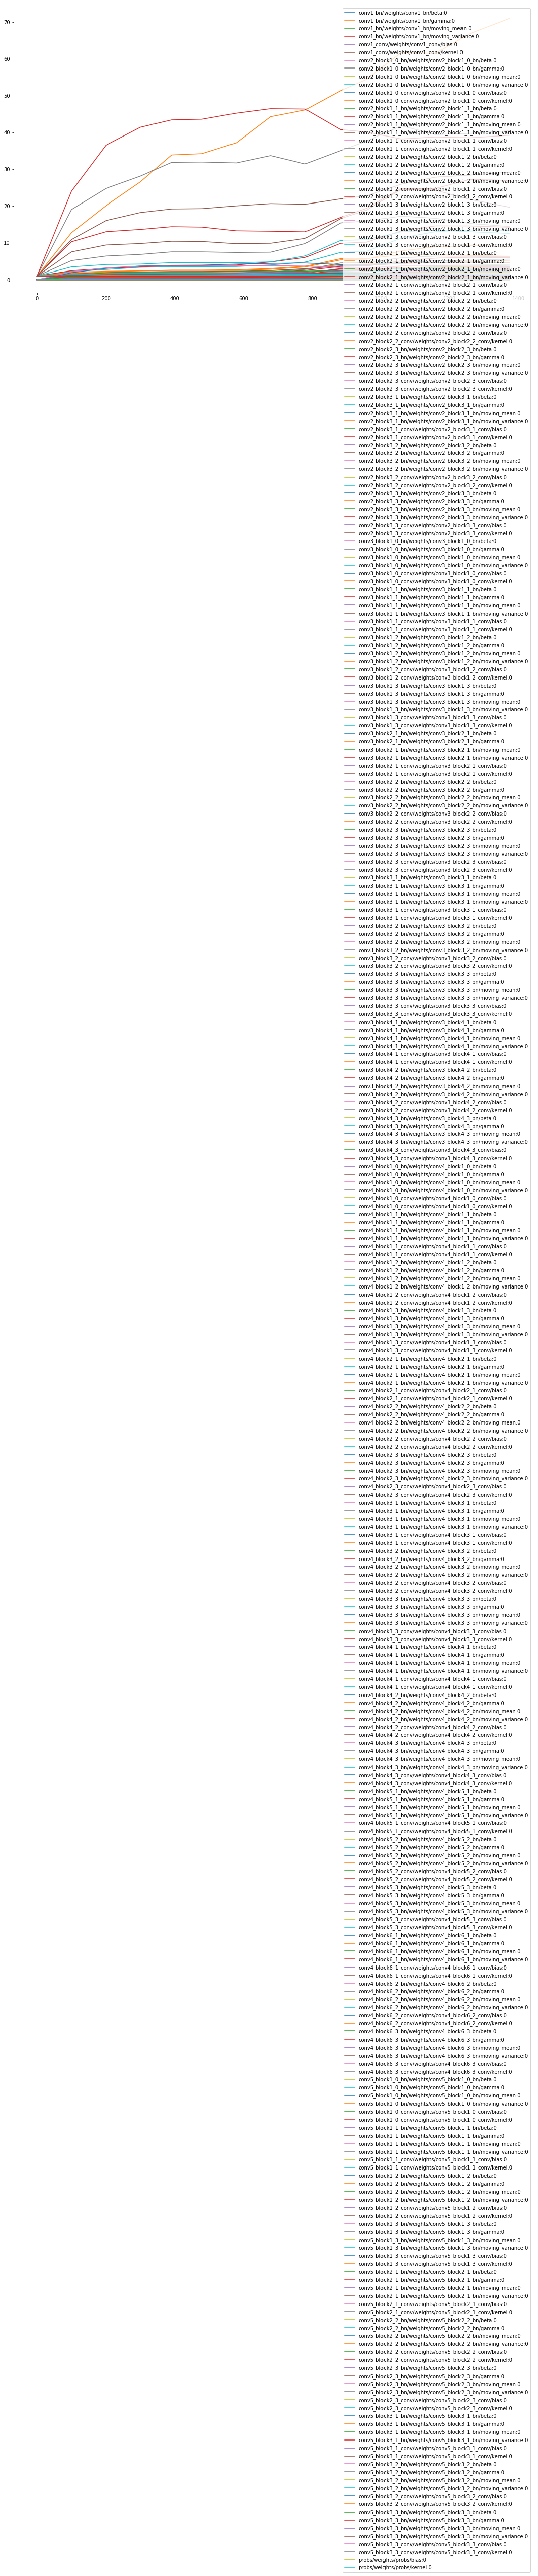

In [77]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

def get_data(trial, tname):
    #print(tname)
    tensor = trial.tensor(tname)
    #print(tensor)
    steps = tensor.steps()
    vals = []
    for s in steps:
        val = tensor.value(s)
        val = np.mean(np.abs(val))
        vals.append(val)        
    return steps,vals

def plot_tensors(lt,ttype):
    for tname in lt.tensor_names(regex=ttype):
        #lst = ['dense/weights/sequential/dense/kernel:0', 'dense_1/weights/sequential/dense_1/kernel:0','dense_2/weights/sequential/dense_2/kernel:0']
        #print(tname)
        #if not tname in lst: continue
        steps, data = get_data(lt, tname)
        plt.plot(steps, data, label=tname)
        
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)    
    plt.legend()
    plt.show()
        

plot_tensors(trial,"weights") 

    
    